In [18]:
import numpy as np
import matplotlib.pylab as plt

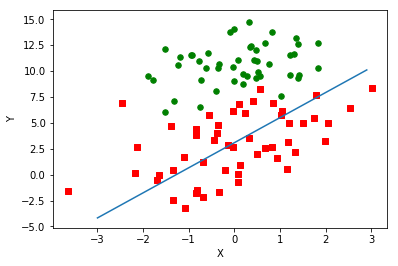

In [47]:
def loadDataSet(fileName):
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

def sigmoid(x):
    return 2 * 1.0/(1 + np.exp(-2 * x)) - 1

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMatrix = np.mat(classLabels).transpose()
    m, n = dataMatrix.shape
    alpha = 0.001
    maxCycles = 5
    
    weight = np.ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weight)
        error = labelMatrix - h
        weight = weight + alpha * dataMatrix.transpose() * error
    return np.array(weight)
def plotBestFit(dataArr, labelMat, weight):
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i] == 1):
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker = 's')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weight[0]-weight[1]*x)/weight[2]
    ax.plot(x, y)
    plt.xlabel('X'); plt.ylabel('Y')
    plt.show()
def testLR():
    # 1.收集并准备数据
    dataMat, labelMat = loadDataSet("data/Logistic/TestSet.txt")

    # print dataMat, '---\n', labelMat
    # 2.训练模型，  f(x)=a1*x1+b2*x2+..+nn*xn中 (a1,b2, .., nn).T的矩阵值
    # 因为数组没有是复制n份， array的乘法就是乘法
    dataArr = np.array(dataMat)
    # print dataArr
    weights = gradAscent(dataArr, labelMat)
    # weights = stocGradAscent0(dataArr, labelMat)
    # weights = stocGradAscent1(dataArr, labelMat)
    # print '*'*30, weights

    # 数据可视化
    plotBestFit(dataArr, labelMat, weights)
    
    
if __name__ == "__main__":
    testLR()